In [2]:
import Modules.utils as utils
import typing
import pandas as pd

from matplotlib.ticker import NullLocator

import matplotlib.pyplot as plt
import matplotlib.axes
import matplotlib.figure


plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "font.family": "serif",
    "text.usetex": True,         
    "pgf.rcfonts": False,
})

In [ ]:
def print_baseline_table(baseline_data: dict, print_latex_help: bool = False) -> pd.DataFrame:
    data = []

    for model, values in baseline_data.items():
        f1 = values["Baseline"]["f1"]
        precision = values["Baseline"]["precision"]
        recall = values["Baseline"]["recall"]
        
        data.append([model, utils.calc_avg(f1, 2), utils.calc_avg(precision, 2), utils.calc_avg(recall, 2)]),

        if print_latex_help: 
            models_str = {"llama_3_2_1b_instruct": "Llama 3.2 1b instruct", "llama_3_2_3b_instruct": "Llama 3.2 3b instruct", "llama_3_1_8b_instruct": "Llama 3.1 8b instruct", "llama_3_1_70b_instruct": "Llama 3.1 70b instruct", "qwen_2_5_1p5b_instruct": "Qwen 2.5 1.5b instruct", "qwen_2_5_3b_instruct": "Qwen 2.5 3b instruct", "qwen_2_5_7b_instruct": "Qwen 2.5 7b instruct", "qwen_2_5_72b_instruct": "Qwen 2.5 72b instruct"}
            print(models_str[model], "&", utils.calc_avg(f1, 2), "&", utils.calc_avg(precision, 2), "&", utils.calc_avg(recall, 2), "\\\\")

    df = pd.DataFrame(data, columns=["Model", "F1", "Precision", "Recall"])
    df.style.set_properties(**{'text-align': 'left'}).set_table_styles(
        [{'selector': 'th', 'props': [('text-align', 'center')]}]
    )
    return df


def print_zero_shot_table(zero_shot_data: dict, print_latex_help: bool = False) -> pd.DataFrame:
    data = []

    for model, values in zero_shot_data.items():
        baseline_f1 = values["Baseline"]["f1"]
        baseline_precision = values["Baseline"]["precision"]
        baseline_recall = values["Baseline"]["recall"]
        
        zs_o1_f1 = values["ZERO-O1"]["f1"]
        zs_o1_precision = values["ZERO-O1"]["precision"]
        zs_o1_recall = values["ZERO-O1"]["recall"]

        zs_o2_f1 = values["ZERO-O2"]["f1"]
        zs_o2_precision = values["ZERO-O2"]["precision"]
        zs_o2_recall = values["ZERO-O2"]["recall"]

        data.append([model, utils.calc_avg(baseline_f1, 2), utils.calc_avg(baseline_precision, 2), utils.calc_avg(baseline_recall, 2),  
                            utils.calc_avg(zs_o1_f1, 2), utils.calc_avg(zs_o1_precision, 2), utils.calc_avg(zs_o1_recall, 2),
                            utils.calc_avg(zs_o2_f1, 2), utils.calc_avg(zs_o2_precision, 2), utils.calc_avg(zs_o2_recall, 2) ]),

        if print_latex_help: 
            models_str = {"llama_3_2_1b_instruct": "Llama 3.2 1b instruct", "llama_3_2_3b_instruct": "Llama 3.2 3b instruct", "llama_3_1_8b_instruct": "Llama 3.1 8b instruct", "llama_3_1_70b_instruct": "Llama 3.1 70b instruct", "qwen_2_5_1p5b_instruct": "Qwen 2.5 1.5b instruct", "qwen_2_5_3b_instruct": "Qwen 2.5 3b instruct", "qwen_2_5_7b_instruct": "Qwen 2.5 7b instruct", "qwen_2_5_72b_instruct": "Qwen 2.5 72b instruct"}
            print(models_str[model], "&", 
                  utils.calc_avg(baseline_f1, 2), "&", utils.calc_avg(baseline_precision, 2), "&", utils.calc_avg(baseline_recall, 2), "&", 
                  utils.calc_avg(zs_o1_f1, 2), "&", utils.calc_avg(zs_o1_precision, 2), "&", utils.calc_avg(zs_o1_recall, 2), "&",
                  utils.calc_avg(zs_o2_f1, 2), "&", utils.calc_avg(zs_o2_precision, 2), "&", utils.calc_avg(zs_o2_recall, 2), "\\\\")

    df = pd.DataFrame(data, columns=["Model", "F1", "Precision", "Recall", "ZS-O1-F1", "ZS-O1-Precision", "ZS-O1-Recall", "ZS-O2-F1", "ZS-O2-Precision", "ZS-O2-Recall", ])
    df.style.set_properties(**{'text-align': 'left'}).set_table_styles(
        [{'selector': 'th', 'props': [('text-align', 'center')]}]
    )
    return df



def print_few_shot_table(zero_shot_data: dict, print_latex_help: bool = False) -> pd.DataFrame:
    data = []

    for model, values in zero_shot_data.items():
        baseline_f1 = values["Baseline"]["f1"]
        baseline_precision = values["Baseline"]["precision"]
        baseline_recall = values["Baseline"]["recall"]

        zs_o1_f1 = values["ZERO-O1"]["f1"]
        zs_o1_precision = values["ZERO-O1"]["precision"]
        zs_o1_recall = values["ZERO-O1"]["recall"]

        zs_o2_f1 = values["ZERO-O2"]["f1"]
        zs_o2_precision = values["ZERO-O2"]["precision"]
        zs_o2_recall = values["ZERO-O2"]["recall"]
        
        fs_o1_f1 = values["FS-O1"]["f1"]
        fs_o1_precision = values["FS-O1"]["precision"]
        fs_o1_recall = values["FS-O1"]["recall"]

        fs_o2_f1 = values["FS-O2"]["f1"]
        fs_o2_precision = values["FS-O2"]["precision"]
        fs_o2_recall = values["FS-O2"]["recall"]

        data.append([model, utils.calc_avg(baseline_f1, 2), utils.calc_avg(baseline_precision, 2), utils.calc_avg(baseline_recall, 2),  
                            utils.calc_avg(fs_o1_f1, 2), utils.calc_avg(fs_o1_precision, 2), utils.calc_avg(fs_o1_recall, 2),
                            utils.calc_avg(fs_o2_f1, 2), utils.calc_avg(fs_o2_precision, 2), utils.calc_avg(fs_o2_recall, 2),
                            utils.calc_avg(zs_o1_f1, 2), utils.calc_avg(zs_o1_precision, 2), utils.calc_avg(zs_o1_recall, 2),
                            utils.calc_avg(zs_o2_f1, 2), utils.calc_avg(zs_o2_precision, 2), utils.calc_avg(zs_o2_recall, 2),
                            ]),

        if print_latex_help: 
            models_str = {"llama_3_2_1b_instruct": "Llama 3.2 1b instruct", "llama_3_2_3b_instruct": "Llama 3.2 3b instruct", "llama_3_1_8b_instruct": "Llama 3.1 8b instruct", "llama_3_1_70b_instruct": "Llama 3.1 70b instruct", "qwen_2_5_1p5b_instruct": "Qwen 2.5 1.5b instruct", "qwen_2_5_3b_instruct": "Qwen 2.5 3b instruct", "qwen_2_5_7b_instruct": "Qwen 2.5 7b instruct", "qwen_2_5_72b_instruct": "Qwen 2.5 72b instruct"}
            print(models_str[model], "&", 
                  utils.calc_avg(baseline_f1, 2), "&", utils.calc_avg(baseline_precision, 2), "&", utils.calc_avg(baseline_recall, 2), "&", 

                
                  utils.calc_avg(fs_o1_f1, 2), "&", utils.calc_avg(fs_o1_precision, 2), "&", utils.calc_avg(fs_o1_recall, 2), "&",
                  utils.calc_avg(fs_o2_f1, 2), "&", utils.calc_avg(fs_o2_precision, 2), "&", utils.calc_avg(fs_o2_recall, 2), "&",

                  utils.calc_avg(zs_o1_f1, 2), "&", utils.calc_avg(zs_o1_precision, 2), "&", utils.calc_avg(zs_o1_recall, 2), "&",
                  utils.calc_avg(zs_o2_f1, 2), "&", utils.calc_avg(zs_o2_precision, 2), "&", utils.calc_avg(zs_o2_recall, 2), 

                  "\\\\")

    df = pd.DataFrame(data, columns=["Model", "F1", "Precision", "Recall", "FS-O1-F1", "FS-O1-Precision", "FS-O1-Recall", "FS-O2-F1", "FS-O2-Precision", "FS-O2-Recall", "ZS-O1-F1", "ZS-O1-Precision", "ZS-O1-Recall", "ZS-O2-F1", "ZS-O2-Precision", "ZS-O2-Recall",])
    df.style.set_properties(**{'text-align': 'left'}).set_table_styles(
        [{'selector': 'th', 'props': [('text-align', 'center')]}]
    )
    return df


line_kwargs = dict(linewidth=0.7, markersize=5)


def generate_plot_base(font_size: int) -> tuple[matplotlib.figure.Figure, matplotlib.axes.Axes, matplotlib.axes.Axes]:
    x_left = [1, 3, 8, 70]
    labels_left = ["Llama 3.2 1B \n instruct", "Llama 3.2 3B \n instruct", "Llama 3.1 8B \n instruct", "Llama 3.1 70B \n instruct"]

    x_right = [1.5, 3, 7, 72]
    labels_right = ["Qwen 2.5 1.5B \n instruct", "Qwen 2.5 3B \n instruct", "Qwen 2.5 7B \n instruct", "Qwen 2.5 72B \n instruct"]


    fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=False)


    ax0: matplotlib.axes.Axes = axes[0]
    ax1: matplotlib.axes.Axes = axes[1]
    assert isinstance(axes[0], matplotlib.axes.Axes) and isinstance(axes[1], matplotlib.axes.Axes)





    
    ax0.set_ylim(0, 1)
    ax0.set_ylabel("F1-Score", fontsize=font_size)

    
    ax0.set_xscale("log")
    ax0.set_xticks(x_left)
    ax0.xaxis.set_minor_locator(NullLocator())
    ax0.set_xticklabels(labels_left, rotation=45, fontsize=font_size, ha="right")

   
    ax1.set_xscale("log")
    ax1.set_xticks(x_right)
    ax1.xaxis.set_minor_locator(NullLocator())
    ax1.set_xticklabels(labels_right, rotation=45, fontsize=font_size, ha="right")

   
    y_ticks = [0.2, 0.4, 0.6, 0.8, 1.0]
    ax0.set_yticks(y_ticks)
    ax0.set_yticklabels(y_ticks, fontsize=font_size)

    ax1.set_yticks(y_ticks)
    ax1.set_yticklabels(y_ticks, fontsize=font_size)

    ax_llama = ax0
    ax_qwen = ax1

    for x in [1, 3, 8, 70]:
        ax_llama.plot([x, x], [0, 1], linestyle="dashed", color="gray", linewidth=0.4, alpha=0.5)

    for x in [1.5, 3, 7, 72]:
        ax_qwen.plot([x, x], [0, 1], linestyle="dashed", color="gray", linewidth=0.4, alpha=0.5)


    ax_llama.set_ylim(0,1)
    ax_qwen.set_ylim(0,1)

    fig.tight_layout()

    return fig, ax_llama, ax_qwen



def get_f1_in_order(model_family: typing.Literal["llama", "qwen"], category: typing.Literal["Baseline", "ZERO-O1", "ZERO-O2", "FS-O1", "FS-O2"], data: dict):
    res = []

    if model_family == "llama":
        res = [  utils.calc_avg(data["llama_3_2_1b_instruct"][category]["f1"]),
                utils.calc_avg(data["llama_3_2_3b_instruct"][category]["f1"]),
                utils.calc_avg(data["llama_3_1_8b_instruct"][category]["f1"]),
                utils.calc_avg(data["llama_3_1_70b_instruct"][category]["f1"])]
        
    elif model_family == "qwen":
        res = [  utils.calc_avg(data["qwen_2_5_1p5b_instruct"][category]["f1"]),
                utils.calc_avg(data["qwen_2_5_3b_instruct"][category]["f1"]),
                utils.calc_avg(data["qwen_2_5_7b_instruct"][category]["f1"]),
                utils.calc_avg(data["qwen_2_5_72b_instruct"][category]["f1"])]

    return res

# 1. Malware Extractor

In [5]:
malware_extractor_data = utils.load_json_files("./Modules/MalwareExtractor", ["Baseline", "ZERO-O1", "ZERO-O2", "FS-O1", "FS-O2"], models=["llama_3_2_1b_instruct", "llama_3_2_3b_instruct", "llama_3_1_8b_instruct", "llama_3_1_70b_instruct", "qwen_2_5_1p5b_instruct", "qwen_2_5_3b_instruct", "qwen_2_5_7b_instruct", "qwen_2_5_72b_instruct"])

## Baseline

In [6]:
print_baseline_table(malware_extractor_data, print_latex_help=True)

Llama 3.2 1b instruct & 0.38 & 0.37 & 0.61 \\
Llama 3.2 3b instruct & 0.57 & 0.51 & 0.84 \\
Llama 3.1 8b instruct & 0.75 & 0.77 & 0.78 \\
Llama 3.1 70b instruct & 0.73 & 0.71 & 0.84 \\
Qwen 2.5 1.5b instruct & 0.62 & 0.72 & 0.65 \\
Qwen 2.5 3b instruct & 0.73 & 0.92 & 0.66 \\
Qwen 2.5 7b instruct & 0.72 & 0.82 & 0.7 \\
Qwen 2.5 72b instruct & 0.78 & 0.78 & 0.83 \\


,Model,F1,Precision,Recall
0,llama_3_2_1b_instruct,0.38,0.37,0.61
1,llama_3_2_3b_instruct,0.57,0.51,0.84
2,llama_3_1_8b_instruct,0.75,0.77,0.78
3,llama_3_1_70b_instruct,0.73,0.71,0.84
4,qwen_2_5_1p5b_instruct,0.62,0.72,0.65
5,qwen_2_5_3b_instruct,0.73,0.92,0.66
6,qwen_2_5_7b_instruct,0.72,0.82,0.70
7,qwen_2_5_72b_instruct,0.78,0.78,0.83


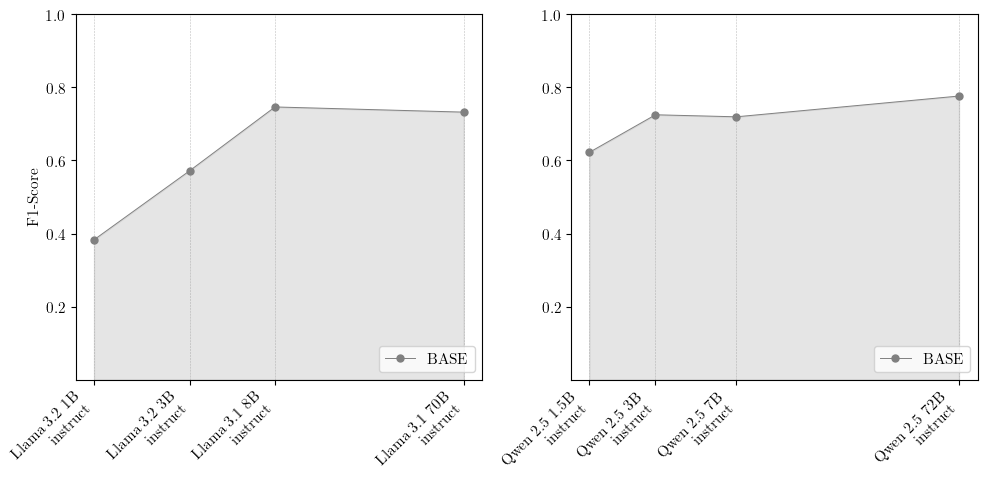

In [36]:
font_size = 11
baseline_fig, ax_llama, ax_qwen = generate_plot_base(font_size=font_size)


llama_baseline_data = get_f1_in_order("llama", "Baseline", malware_extractor_data)
llama_model_sizes = [1, 3, 8, 70]

# FILL BASELINE
ax_llama.fill_between(llama_model_sizes, 0, llama_baseline_data, color="gray", alpha=0.2)

# BASELINE
ax_llama.plot(llama_model_sizes, llama_baseline_data, **line_kwargs,
            marker="o",
            color="gray",
            label="BASE"
            )



qwen_baseline_data = get_f1_in_order("qwen", "Baseline", malware_extractor_data)
qwen_model_sizes = [1.5, 3, 7, 72]

# FILL BASELINE
ax_qwen.fill_between(qwen_model_sizes, 0, qwen_baseline_data, color="gray", alpha=0.2)

# BASELINE
ax_qwen.plot(qwen_model_sizes, qwen_baseline_data, **line_kwargs,
            marker="o",
            color="gray",
            label="BASE"
            )



ax_llama.legend(loc="lower right", prop={'size': font_size})
ax_qwen.legend(loc="lower right", prop={'size': font_size})

# baseline_fig.savefig("./pgfs/MalwareExtractorBase.pgf")

## ZERO SHOT

In [ ]:
df = print_zero_shot_table(malware_extractor_data, print_latex_help=False)

In [ ]:
import matplotlib.lines


font_size = 11
baseline_fig, ax_llama, ax_qwen = generate_plot_base(font_size=font_size)


llama_model_sizes = [1, 3, 8, 70]

# LLAMA FILL BASELINE
ax_llama.fill_between(llama_model_sizes, 0, get_f1_in_order("llama", "Baseline", malware_extractor_data), color="gray", alpha=0.2)


# LLAMA BASELINE
ax_llama.plot(llama_model_sizes, get_f1_in_order("llama", "Baseline", malware_extractor_data), **line_kwargs,
            marker="o",
            color="gray",
            label="BASE"
            )

# LLAMA ZS O1
ax_llama.plot(llama_model_sizes[:2], get_f1_in_order("llama", "ZERO-O1", data=malware_extractor_data)[:2], **line_kwargs,
            marker="s",
            label="ZS-O1",
            color="blue"
            )

# LLAMA ZS O1: llama 3.2 3b instruct ZS-O1 --> llama 3.1 8b instruct BASE
ax_llama.plot([3, 8], [get_f1_in_order("llama", "ZERO-O1", malware_extractor_data)[1], get_f1_in_order("llama", "Baseline", malware_extractor_data)[2]], color="gray", zorder=0, **line_kwargs,)


# LLAMA ZS O1 llama 3.1 8b instruct BASE --> llama 3.1 70b instruct O1 
ax_llama.plot(llama_model_sizes[2:], get_f1_in_order("llama", "ZERO-O1", malware_extractor_data)[2:], color="blue", marker="s", zorder=0, **line_kwargs, markevery=[1])




# LLAMA ZS O2
ax_llama.plot(llama_model_sizes[:2], get_f1_in_order("llama", "ZERO-O2", data=malware_extractor_data)[:2], **line_kwargs,
            marker="^",
            label="ZS-O2",
            color="red"
            )

# LLAMA ZS O2: llama 3.2 3b instruct ZS-O1 --> llama 3.1 8b instruct BASE
ax_llama.plot([3, 8], [get_f1_in_order("llama", "ZERO-O2", malware_extractor_data)[1], get_f1_in_order("llama", "Baseline", malware_extractor_data)[2]], color="gray", zorder=0, **line_kwargs)




# QWEN FILL BASELINE
ax_qwen.fill_between(qwen_model_sizes, 0, get_f1_in_order("qwen", "Baseline", malware_extractor_data), color="gray", alpha=0.2)

# QWEN BASELINE
ax_qwen.plot(qwen_model_sizes, get_f1_in_order("qwen", "Baseline", malware_extractor_data), **line_kwargs,
            marker="o",
            color="gray",
            label="BASE"
            )


# QWEN ZS O1
ax_qwen.plot(qwen_model_sizes, get_f1_in_order("qwen", "ZERO-O1", data=malware_extractor_data), **line_kwargs,
            marker="s",
            label="ZS-O1",
            color="blue",
            zorder=2,
            )


# QWEN ZS O2
ax_qwen.plot(qwen_model_sizes, get_f1_in_order("qwen", "ZERO-O2", data=malware_extractor_data), **line_kwargs,
            marker="^",
            label="ZS-O2",
            color="red",
            zorder=1,
            )


ax_llama.legend(loc="lower right", prop={'size': font_size})
ax_qwen.legend(loc="lower right", prop={'size': font_size})


baseline_fig.savefig("./pgfs/MalwareExtractorZS.pgf")

## FEW SHOT

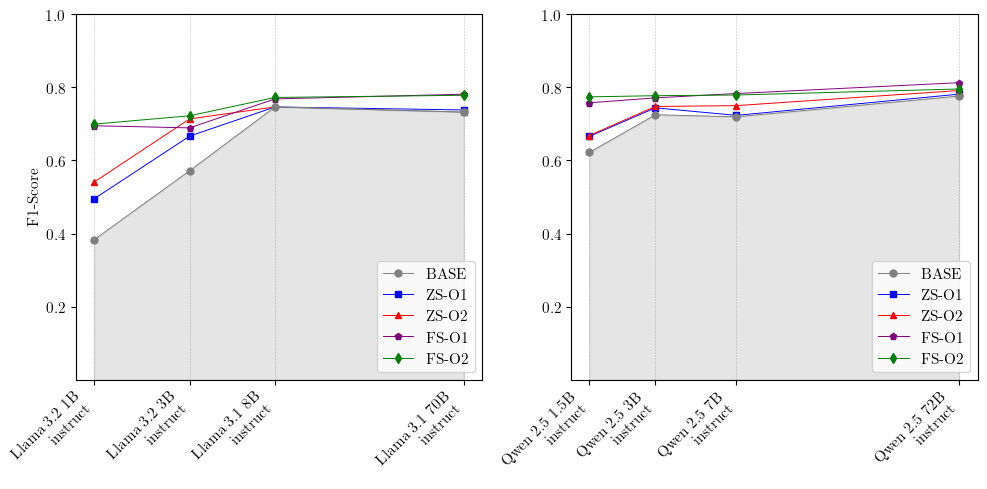

In [39]:
import matplotlib.lines

font_size = 11
baseline_fig, ax_llama, ax_qwen = generate_plot_base(font_size=font_size)



llama_model_sizes = [1, 3, 8, 70]

# LLAMA FILL BASELINE
ax_llama.fill_between(llama_model_sizes, 0, get_f1_in_order("llama", "Baseline", malware_extractor_data), color="gray", alpha=0.2)


# LLAMA BASELINE
ax_llama.plot(llama_model_sizes, get_f1_in_order("llama", "Baseline", malware_extractor_data), **line_kwargs,
            marker="o",
            color="gray",
            label="BASE",
            zorder=10,
            )

# LLAMA ZS O1
ax_llama.plot(llama_model_sizes[:2], get_f1_in_order("llama", "ZERO-O1", data=malware_extractor_data)[:2], **line_kwargs,
            marker="s",
            label="ZS-O1",
            color="blue",
            zorder=0,
            )

# LLAMA ZS O1: llama 3.2 3b instruct ZS-O1 --> llama 3.1 8b instruct BASE
ax_llama.plot([3, 8], [get_f1_in_order("llama", "ZERO-O1", malware_extractor_data)[1], get_f1_in_order("llama", "Baseline", malware_extractor_data)[2]], color="blue", **line_kwargs, zorder=0)


# LLAMA ZS O1 llama 3.1 8b instruct BASE --> llama 3.1 70b instruct O1 
ax_llama.plot(llama_model_sizes[2:], get_f1_in_order("llama", "ZERO-O1", malware_extractor_data)[2:], color="blue", marker="s", **line_kwargs, markevery=[1], zorder=0)


# LLAMA ZS O2: llama 3.2 3b instruct ZS-O1 --> llama 3.1 8b instruct BASE
ax_llama.plot([3, 8], [get_f1_in_order("llama", "ZERO-O2", malware_extractor_data)[1], get_f1_in_order("llama", "Baseline", malware_extractor_data)[2]], color="red", **line_kwargs, zorder=0)

# LLAMA ZS O2 llama 3.1 8b instruct BASE --> llama 3.1 70b instruct O2
ax_llama.plot(llama_model_sizes[2:], get_f1_in_order("llama", "ZERO-O2", malware_extractor_data)[2:], color="gray", marker="s", **line_kwargs, markevery=[1], zorder=0)


# LLAMA ZS O2
ax_llama.plot(llama_model_sizes[:2], get_f1_in_order("llama", "ZERO-O2", data=malware_extractor_data)[:2], **line_kwargs,
            marker="^",
            label="ZS-O2",
            color="red",
            zorder=0,
            )




# QWEN FILL BASELINE
ax_qwen.fill_between(qwen_model_sizes, 0, get_f1_in_order("qwen", "Baseline", malware_extractor_data), color="gray", alpha=0.2)

# QWEN BASELINE
ax_qwen.plot(qwen_model_sizes, get_f1_in_order("qwen", "Baseline", malware_extractor_data), **line_kwargs,
            marker="o",
            color="gray",
            label="BASE",
            zorder=10,
            )


# QWEN ZS O1
ax_qwen.plot(qwen_model_sizes, get_f1_in_order("qwen", "ZERO-O1", data=malware_extractor_data), **line_kwargs,
            marker="s",
            label="ZS-O1",
            color="blue",
            zorder=0,

            )


# QWEN ZS O2
ax_qwen.plot(qwen_model_sizes, get_f1_in_order("qwen", "ZERO-O2", data=malware_extractor_data), **line_kwargs,
            marker="^",
            label="ZS-O2",
            color="red",
            zorder=0,

            )




# LLAMA FS O1
ax_llama.plot(llama_model_sizes[:], get_f1_in_order("llama", "FS-O1", data=malware_extractor_data)[:], **line_kwargs,
            marker="p",
            label="FS-O1",
            color="purple",
            zorder=10,
            )


# LLAMA FS O2
ax_llama.plot(llama_model_sizes[:], get_f1_in_order("llama", "FS-O2", data=malware_extractor_data)[:], **line_kwargs,
            marker="d",
            label="FS-O2",
            color="green",
            zorder=10,
            )


# QWEN FS O1
ax_qwen.plot(qwen_model_sizes, get_f1_in_order("qwen", "FS-O1", data=malware_extractor_data), **line_kwargs,
            marker="p",
            label="FS-O1",
            color="purple",
            zorder=10,
            )


# QWEN FS O2
ax_qwen.plot(qwen_model_sizes, get_f1_in_order("qwen", "FS-O2", data=malware_extractor_data), **line_kwargs,
            marker="d",
            label="FS-O2",
            color="green",
            zorder=10,
            )


ax_llama.legend(loc="lower right", prop={'size': font_size})
ax_qwen.legend(loc="lower right", prop={'size': font_size})


# baseline_fig.savefig("./pgfs/MalwareExtractorFS.pgf")

In [40]:
df = print_few_shot_table(malware_extractor_data, print_latex_help=True)

Llama 3.2 1b instruct & 0.38 & 0.37 & 0.61 & 0.7 & 0.9 & 0.62 & 0.7 & 0.75 & 0.75 & 0.49 & 0.5 & 0.66 & 0.54 & 0.61 & 0.65 \\
Llama 3.2 3b instruct & 0.57 & 0.51 & 0.84 & 0.69 & 0.79 & 0.66 & 0.72 & 0.75 & 0.75 & 0.67 & 0.63 & 0.83 & 0.71 & 0.74 & 0.75 \\
Llama 3.1 8b instruct & 0.75 & 0.77 & 0.78 & 0.77 & 0.82 & 0.78 & 0.77 & 0.8 & 0.81 & 0.75 & 0.77 & 0.78 & 0.75 & 0.77 & 0.78 \\
Llama 3.1 70b instruct & 0.73 & 0.71 & 0.84 & 0.78 & 0.8 & 0.83 & 0.78 & 0.78 & 0.84 & 0.74 & 0.72 & 0.84 & 0.73 & 0.71 & 0.84 \\
Qwen 2.5 1.5b instruct & 0.62 & 0.72 & 0.65 & 0.76 & 0.89 & 0.73 & 0.77 & 0.89 & 0.74 & 0.67 & 0.78 & 0.64 & 0.67 & 0.77 & 0.65 \\
Qwen 2.5 3b instruct & 0.73 & 0.92 & 0.66 & 0.77 & 0.91 & 0.73 & 0.78 & 0.9 & 0.73 & 0.74 & 0.9 & 0.69 & 0.75 & 0.9 & 0.7 \\
Qwen 2.5 7b instruct & 0.72 & 0.82 & 0.7 & 0.78 & 0.92 & 0.74 & 0.78 & 0.87 & 0.76 & 0.72 & 0.84 & 0.7 & 0.75 & 0.87 & 0.71 \\
Qwen 2.5 72b instruct & 0.78 & 0.78 & 0.83 & 0.81 & 0.85 & 0.83 & 0.8 & 0.82 & 0.83 & 0.78 & 0.79 & 0.

In [41]:
for col in df.columns:
    if "Recall" in str(col) or "Precision" in str(col):
        df = df.drop(col, axis=1)
df

,Model,F1,FS-O1-F1,FS-O2-F1,ZS-O1-F1,ZS-O2-F1
0,llama_3_2_1b_instruct,0.38,0.70,0.70,0.49,0.54
1,llama_3_2_3b_instruct,0.57,0.69,0.72,0.67,0.71
2,llama_3_1_8b_instruct,0.75,0.77,0.77,0.75,0.75
3,llama_3_1_70b_instruct,0.73,0.78,0.78,0.74,0.73
4,qwen_2_5_1p5b_instruct,0.62,0.76,0.77,0.67,0.67
5,qwen_2_5_3b_instruct,0.73,0.77,0.78,0.74,0.75
6,qwen_2_5_7b_instruct,0.72,0.78,0.78,0.72,0.75
7,qwen_2_5_72b_instruct,0.78,0.81,0.80,0.78,0.79


# Threat Actor Extractor

In [10]:
threat_actor_extractor_data = utils.load_json_files("./Modules/ThreatActorExtractor/", ["Baseline", "ZERO-O1", "ZERO-O2", "FS-O1", "FS-O2"], models=["llama_3_2_1b_instruct", "llama_3_2_3b_instruct", "llama_3_1_8b_instruct", "llama_3_1_70b_instruct", "qwen_2_5_1p5b_instruct", "qwen_2_5_3b_instruct", "qwen_2_5_7b_instruct", "qwen_2_5_72b_instruct"])

## Baseline

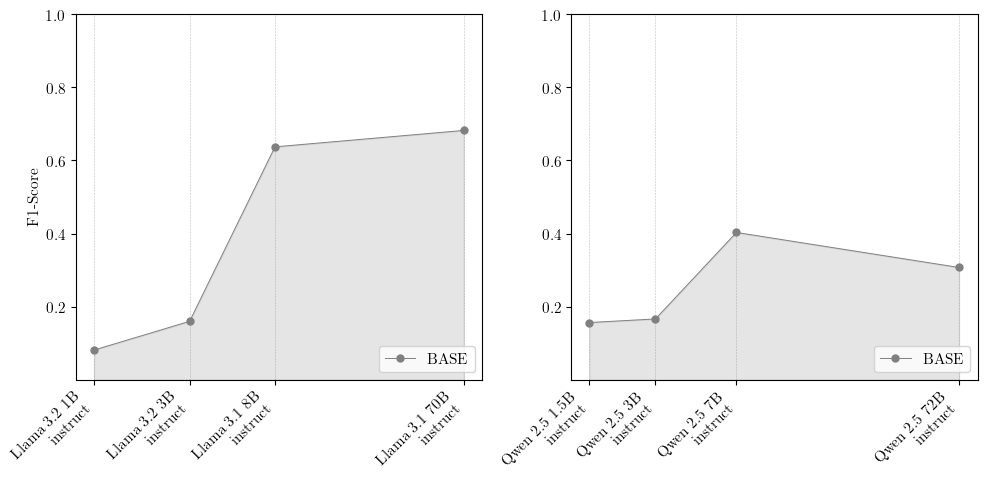

In [42]:
font_size = 11
baseline_fig, ax_llama, ax_qwen = generate_plot_base(font_size=font_size)


llama_baseline_data = get_f1_in_order("llama", "Baseline", threat_actor_extractor_data)
llama_model_sizes = [1, 3, 8, 70]

# FILL BASELINE
ax_llama.fill_between(llama_model_sizes, 0, llama_baseline_data, color="gray", alpha=0.2)

# BASELINE
ax_llama.plot(llama_model_sizes, llama_baseline_data, **line_kwargs,
            marker="o",
            color="gray",
            label="BASE"
            )



qwen_baseline_data = get_f1_in_order("qwen", "Baseline", threat_actor_extractor_data)
qwen_model_sizes = [1.5, 3, 7, 72]

# FILL BASELINE
ax_qwen.fill_between(qwen_model_sizes, 0, qwen_baseline_data, color="gray", alpha=0.2)

# BASELINE
ax_qwen.plot(qwen_model_sizes, qwen_baseline_data, **line_kwargs,
            marker="o",
            color="gray",
            label="BASE"
            )



ax_llama.legend(loc="lower right", prop={'size': font_size})
ax_qwen.legend(loc="lower right", prop={'size': font_size})

# baseline_fig.savefig("./pgfs/ThreatActorExtractorBase.pgf")

## FEW SHOT

In [13]:
df = print_few_shot_table(threat_actor_extractor_data, print_latex_help=True)

df

Llama 3.2 1b instruct & 0.08 & 0.06 & 0.17 & 0.6 & 0.6 & 0.6 & 0.6 & 0.59 & 0.62 & 0.12 & 0.09 & 0.26 & 0.13 & 0.1 & 0.23 \\
Llama 3.2 3b instruct & 0.16 & 0.13 & 0.3 & 0.62 & 0.62 & 0.63 & 0.68 & 0.68 & 0.68 & 0.18 & 0.15 & 0.31 & 0.18 & 0.15 & 0.32 \\
Llama 3.1 8b instruct & 0.64 & 0.63 & 0.66 & 0.75 & 0.75 & 0.76 & 0.75 & 0.76 & 0.76 & 0.64 & 0.63 & 0.66 & 0.64 & 0.63 & 0.66 \\
Llama 3.1 70b instruct & 0.68 & 0.7 & 0.69 & 0.78 & 0.78 & 0.79 & 0.75 & 0.76 & 0.78 & 0.76 & 0.77 & 0.77 & 0.74 & 0.76 & 0.75 \\
Qwen 2.5 1.5b instruct & 0.16 & 0.13 & 0.3 & 0.29 & 0.32 & 0.31 & 0.44 & 0.48 & 0.43 & 0.22 & 0.22 & 0.26 & 0.22 & 0.23 & 0.26 \\
Qwen 2.5 3b instruct & 0.17 & 0.2 & 0.15 & 0.4 & 0.45 & 0.38 & 0.28 & 0.32 & 0.27 & 0.28 & 0.31 & 0.29 & 0.33 & 0.37 & 0.31 \\
Qwen 2.5 7b instruct & 0.4 & 0.43 & 0.4 & 0.57 & 0.59 & 0.56 & 0.67 & 0.71 & 0.65 & 0.61 & 0.64 & 0.6 & 0.64 & 0.67 & 0.64 \\
Qwen 2.5 72b instruct & 0.31 & 0.32 & 0.32 & 0.45 & 0.46 & 0.46 & 0.55 & 0.56 & 0.57 & 0.61 & 0.63 & 0.

,Model,F1,Precision,Recall,FS-O1-F1,FS-O1-Precision,FS-O1-Recall,FS-O2-F1,FS-O2-Precision,FS-O2-Recall,ZS-O1-F1,ZS-O1-Precision,ZS-O1-Recall,ZS-O2-F1,ZS-O2-Precision,ZS-O2-Recall
0,llama_3_2_1b_instruct,0.08,0.06,0.17,0.60,0.60,0.60,0.60,0.59,0.62,0.12,0.09,0.26,0.13,0.10,0.23
1,llama_3_2_3b_instruct,0.16,0.13,0.30,0.62,0.62,0.63,0.68,0.68,0.68,0.18,0.15,0.31,0.18,0.15,0.32
2,llama_3_1_8b_instruct,0.64,0.63,0.66,0.75,0.75,0.76,0.75,0.76,0.76,0.64,0.63,0.66,0.64,0.63,0.66
3,llama_3_1_70b_instruct,0.68,0.70,0.69,0.78,0.78,0.79,0.75,0.76,0.78,0.76,0.77,0.77,0.74,0.76,0.75
4,qwen_2_5_1p5b_instruct,0.16,0.13,0.30,0.29,0.32,0.31,0.44,0.48,0.43,0.22,0.22,0.26,0.22,0.23,0.26
5,qwen_2_5_3b_instruct,0.17,0.20,0.15,0.40,0.45,0.38,0.28,0.32,0.27,0.28,0.31,0.29,0.33,0.37,0.31
6,qwen_2_5_7b_instruct,0.40,0.43,0.40,0.57,0.59,0.56,0.67,0.71,0.65,0.61,0.64,0.60,0.64,0.67,0.64
7,qwen_2_5_72b_instruct,0.31,0.32,0.32,0.45,0.46,0.46,0.55,0.56,0.57,0.61,0.63,0.62,0.57,0.59,0.59


In [14]:
for col in df.columns:
    if "Recall" in str(col) or "Precision" in str(col):
        df = df.drop(col, axis=1)

df

,Model,F1,FS-O1-F1,FS-O2-F1,ZS-O1-F1,ZS-O2-F1
0,llama_3_2_1b_instruct,0.08,0.60,0.60,0.12,0.13
1,llama_3_2_3b_instruct,0.16,0.62,0.68,0.18,0.18
2,llama_3_1_8b_instruct,0.64,0.75,0.75,0.64,0.64
3,llama_3_1_70b_instruct,0.68,0.78,0.75,0.76,0.74
4,qwen_2_5_1p5b_instruct,0.16,0.29,0.44,0.22,0.22
5,qwen_2_5_3b_instruct,0.17,0.40,0.28,0.28,0.33
6,qwen_2_5_7b_instruct,0.40,0.57,0.67,0.61,0.64
7,qwen_2_5_72b_instruct,0.31,0.45,0.55,0.61,0.57


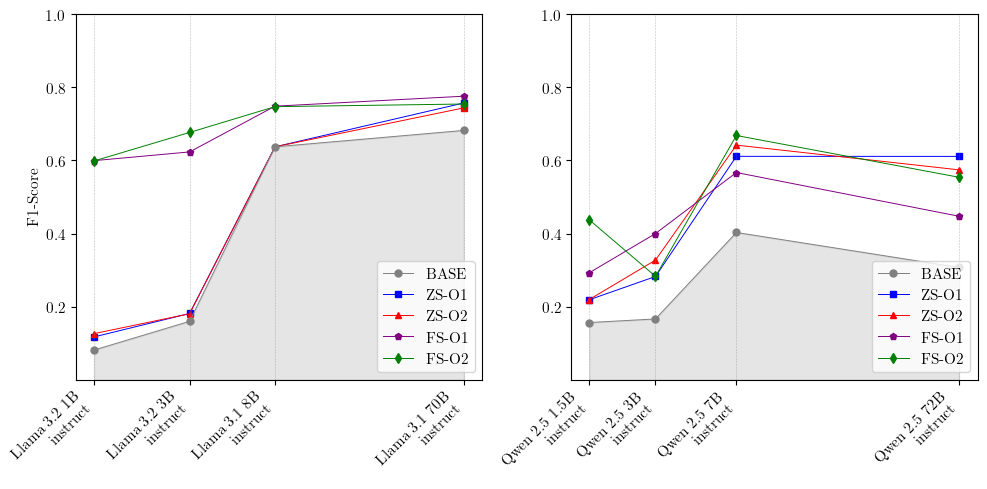

In [43]:
font_size = 11
baseline_fig, ax_llama, ax_qwen = generate_plot_base(font_size=font_size)


llama_baseline_data = get_f1_in_order("llama", "Baseline", threat_actor_extractor_data)
llama_model_sizes = [1, 3, 8, 70]

# FILL BASELINE
ax_llama.fill_between(llama_model_sizes, 0, llama_baseline_data, color="gray", alpha=0.2)

# BASELINE
ax_llama.plot(llama_model_sizes, llama_baseline_data, **line_kwargs,
            marker="o",
            color="gray",
            label="BASE"
            )



qwen_baseline_data = get_f1_in_order("qwen", "Baseline", threat_actor_extractor_data)
qwen_model_sizes = [1.5, 3, 7, 72]

# FILL BASELINE
ax_qwen.fill_between(qwen_model_sizes, 0, qwen_baseline_data, color="gray", alpha=0.2)

# BASELINE
ax_qwen.plot(qwen_model_sizes, qwen_baseline_data, **line_kwargs,
            marker="o",
            color="gray",
            label="BASE"
            )





# LLAMA ZS O1
ax_llama.plot(llama_model_sizes[:2], get_f1_in_order("llama", "ZERO-O1", data=threat_actor_extractor_data)[:2], **line_kwargs,
            marker="s",
            label="ZS-O1",
            color="blue",
            zorder=0,
            )



# LLAMA ZS O2
ax_llama.plot(llama_model_sizes[:2], get_f1_in_order("llama", "ZERO-O2", data=threat_actor_extractor_data)[:2], **line_kwargs,
            marker="^",
            label="ZS-O2",
            color="red",
            zorder=0,
            )


# LLAMA ZS O1: llama 3.2 3b instruct ZS-O1 --> llama 3.1 8b instruct BASE
ax_llama.plot([3, 8], [get_f1_in_order("llama", "ZERO-O1", threat_actor_extractor_data)[1], get_f1_in_order("llama", "Baseline", threat_actor_extractor_data)[2]], color="blue", **line_kwargs, zorder=0)


# LLAMA ZS O1 llama 3.1 8b instruct BASE --> llama 3.1 70b instruct O1 
ax_llama.plot(llama_model_sizes[2:], get_f1_in_order("llama", "ZERO-O1", threat_actor_extractor_data)[2:], color="blue", marker="s", **line_kwargs, markevery=[1], zorder=0)



# LLAMA ZS O2: llama 3.2 3b instruct ZS-O1 --> llama 3.1 8b instruct BASE
ax_llama.plot([3, 8], [get_f1_in_order("llama", "ZERO-O2", threat_actor_extractor_data)[1], get_f1_in_order("llama", "Baseline", threat_actor_extractor_data)[2]], color="red", **line_kwargs, zorder=0)

# LLAMA ZS O2 llama 3.1 8b instruct BASE --> llama 3.1 70b instruct O2
ax_llama.plot(llama_model_sizes[2:], get_f1_in_order("llama", "ZERO-O2", threat_actor_extractor_data)[2:], color="red", marker="s", **line_kwargs, markevery=[1], zorder=0)





# QWEN ZS O1
ax_qwen.plot(qwen_model_sizes, get_f1_in_order("qwen", "ZERO-O1", data=threat_actor_extractor_data), **line_kwargs,
            marker="s",
            label="ZS-O1",
            color="blue",
            zorder=0,
            )


# QWEN ZS O2
ax_qwen.plot(qwen_model_sizes, get_f1_in_order("qwen", "ZERO-O2", data=threat_actor_extractor_data), **line_kwargs,
            marker="^",
            label="ZS-O2",
            color="red",
            zorder=0,
            )










# LLAMA FS O1
ax_llama.plot(llama_model_sizes[:], get_f1_in_order("llama", "FS-O1", data=threat_actor_extractor_data)[:], **line_kwargs,
            marker="p",
            label="FS-O1",
            color="purple",
            zorder=10,
            )


# LLAMA FS O2
ax_llama.plot(llama_model_sizes[:], get_f1_in_order("llama", "FS-O2", data=threat_actor_extractor_data)[:], **line_kwargs,
            marker="d",
            label="FS-O2",
            color="green",
            zorder=10,
            )







# QWEN FS O1
ax_qwen.plot(qwen_model_sizes, get_f1_in_order("qwen", "FS-O1", data=threat_actor_extractor_data), **line_kwargs,
            marker="p",
            label="FS-O1",
            color="purple",
            zorder=10,
            )

# QWEN FS O2
ax_qwen.plot(qwen_model_sizes, get_f1_in_order("qwen", "FS-O2", data=threat_actor_extractor_data), **line_kwargs,
            marker="d",
            label="FS-O2",
            color="green",
            zorder=10,
            )



ax_llama.legend(loc="lower right", prop={'size': font_size})
ax_qwen.legend(loc="lower right", prop={'size': font_size})

# baseline_fig.savefig("./pgfs/ThreatActorExtractorFS.pgf")

# Attack Pattern Extractor

In [44]:
attack_pattern_extractor_data = utils.load_json_files("./Modules/AttackPatternExtractor/", ["Baseline", "ZERO-O1", "ZERO-O2", "FS-O1", "FS-O2"], models=["llama_3_2_1b_instruct", "llama_3_2_3b_instruct", "llama_3_1_8b_instruct", "llama_3_1_70b_instruct", "qwen_2_5_1p5b_instruct", "qwen_2_5_3b_instruct", "qwen_2_5_7b_instruct", "qwen_2_5_72b_instruct"])

In [45]:
print_baseline_table(attack_pattern_extractor_data, print_latex_help=False)

,Model,F1,Precision,Recall
0,llama_3_2_1b_instruct,0.00,0.01,0.00
1,llama_3_2_3b_instruct,0.05,0.07,0.04
2,llama_3_1_8b_instruct,0.35,0.39,0.35
3,llama_3_1_70b_instruct,0.35,0.42,0.34
4,qwen_2_5_1p5b_instruct,0.03,0.06,0.02
5,qwen_2_5_3b_instruct,0.25,0.37,0.21
6,qwen_2_5_7b_instruct,0.33,0.40,0.31
7,qwen_2_5_72b_instruct,0.41,0.50,0.40


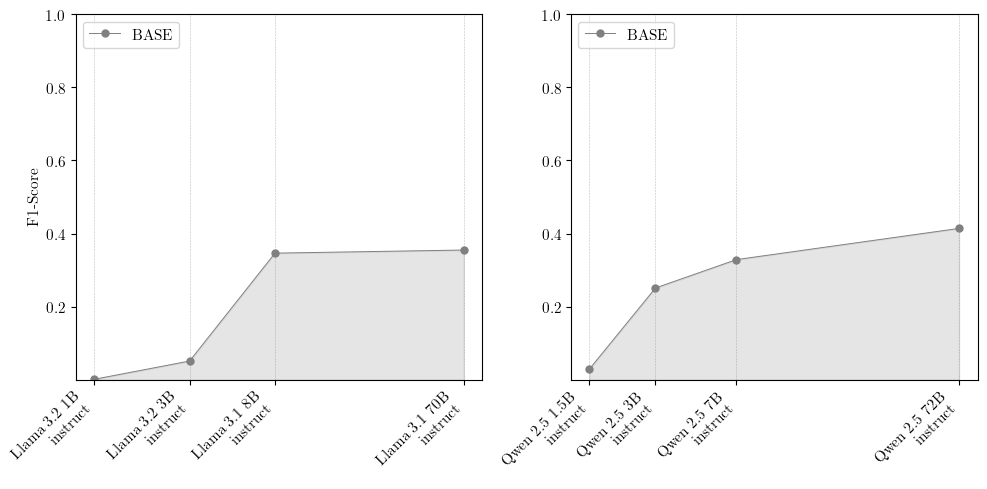

In [46]:
font_size = 11
baseline_fig, ax_llama, ax_qwen = generate_plot_base(font_size=font_size)

llama_model_sizes = [1, 3, 8, 70]
qwen_model_sizes = [1.5, 3, 7, 72]

# === LLAMA BASELINE ===
llama_baseline_data = get_f1_in_order("llama", "Baseline", attack_pattern_extractor_data)

# Fill
ax_llama.fill_between(llama_model_sizes, 0, llama_baseline_data, color="gray", alpha=0.2)

# Points
ax_llama.plot(1, llama_baseline_data[0], marker="o", color="gray", label="BASE", **line_kwargs)
ax_llama.plot(3, llama_baseline_data[1], marker="o", color="gray", **line_kwargs)
ax_llama.plot(8, llama_baseline_data[2], marker="o", color="gray", **line_kwargs)
ax_llama.plot(70, llama_baseline_data[3], marker="o", color="gray", **line_kwargs)

# Lines
ax_llama.plot([1, 3], [llama_baseline_data[0], llama_baseline_data[1]], color="gray", **line_kwargs)
ax_llama.plot([3, 8], [llama_baseline_data[1], llama_baseline_data[2]], color="gray", **line_kwargs)
ax_llama.plot([8, 70], [llama_baseline_data[2], llama_baseline_data[3]], color="gray", **line_kwargs)



# === QWEN BASELINE ===
qwen_baseline_data = get_f1_in_order("qwen", "Baseline", attack_pattern_extractor_data)

# Fill
ax_qwen.fill_between(qwen_model_sizes, 0, qwen_baseline_data, color="gray", alpha=0.2)

# Points
ax_qwen.plot(1.5, qwen_baseline_data[0], marker="o", color="gray", label="BASE", **line_kwargs)
ax_qwen.plot(3, qwen_baseline_data[1], marker="o", color="gray", **line_kwargs)
ax_qwen.plot(7, qwen_baseline_data[2], marker="o", color="gray", **line_kwargs)
ax_qwen.plot(72, qwen_baseline_data[3], marker="o", color="gray", **line_kwargs)

# Lines
ax_qwen.plot([1.5, 3], [qwen_baseline_data[0], qwen_baseline_data[1]], color="gray", **line_kwargs)
ax_qwen.plot([3, 7], [qwen_baseline_data[1], qwen_baseline_data[2]], color="gray", **line_kwargs)
ax_qwen.plot([7, 72], [qwen_baseline_data[2], qwen_baseline_data[3]], color="gray", **line_kwargs)

# === LEGENDS + SAVE ===
ax_llama.legend(loc="upper left", prop={'size': font_size})
ax_qwen.legend(loc="upper left", prop={'size': font_size})

# baseline_fig.savefig("./pgfs/AttackPatternExtractorBase.pgf")

In [21]:
df = print_few_shot_table(attack_pattern_extractor_data, print_latex_help=True)

for col in df.columns:
    if "Recall" in str(col) or "Precision" in str(col):
        df = df.drop(col, axis=1)

df

Llama 3.2 1b instruct & 0.0 & 0.01 & 0.0 & 0.0 & 0.01 & 0.0 & 0.12 & 0.25 & 0.09 & 0.01 & 0.03 & 0.01 & 0.0 & 0.01 & 0.0 \\
Llama 3.2 3b instruct & 0.05 & 0.07 & 0.04 & 0.05 & 0.07 & 0.05 & 0.24 & 0.38 & 0.2 & 0.05 & 0.07 & 0.05 & 0.05 & 0.08 & 0.05 \\
Llama 3.1 8b instruct & 0.35 & 0.39 & 0.35 & 0.34 & 0.38 & 0.34 & 0.36 & 0.53 & 0.3 & 0.38 & 0.43 & 0.37 & 0.35 & 0.4 & 0.36 \\
Llama 3.1 70b instruct & 0.35 & 0.42 & 0.34 & 0.44 & 0.51 & 0.43 & 0.43 & 0.57 & 0.38 & 0.38 & 0.45 & 0.37 & 0.36 & 0.43 & 0.34 \\
Qwen 2.5 1.5b instruct & 0.03 & 0.06 & 0.02 & 0.25 & 0.3 & 0.24 & 0.29 & 0.36 & 0.28 & 0.02 & 0.05 & 0.02 & 0.11 & 0.2 & 0.08 \\
Qwen 2.5 3b instruct & 0.25 & 0.37 & 0.21 & 0.36 & 0.43 & 0.35 & 0.4 & 0.45 & 0.39 & 0.25 & 0.37 & 0.21 & 0.29 & 0.4 & 0.26 \\
Qwen 2.5 7b instruct & 0.33 & 0.4 & 0.31 & 0.32 & 0.4 & 0.3 & 0.35 & 0.39 & 0.34 & 0.33 & 0.4 & 0.3 & 0.33 & 0.39 & 0.31 \\
Qwen 2.5 72b instruct & 0.41 & 0.5 & 0.4 & 0.44 & 0.47 & 0.46 & 0.44 & 0.47 & 0.46 & 0.43 & 0.54 & 0.4 & 0.4

,Model,F1,FS-O1-F1,FS-O2-F1,ZS-O1-F1,ZS-O2-F1
0,llama_3_2_1b_instruct,0.00,0.00,0.12,0.01,0.00
1,llama_3_2_3b_instruct,0.05,0.05,0.24,0.05,0.05
2,llama_3_1_8b_instruct,0.35,0.34,0.36,0.38,0.35
3,llama_3_1_70b_instruct,0.35,0.44,0.43,0.38,0.36
4,qwen_2_5_1p5b_instruct,0.03,0.25,0.29,0.02,0.11
5,qwen_2_5_3b_instruct,0.25,0.36,0.40,0.25,0.29
6,qwen_2_5_7b_instruct,0.33,0.32,0.35,0.33,0.33
7,qwen_2_5_72b_instruct,0.41,0.44,0.44,0.43,0.41


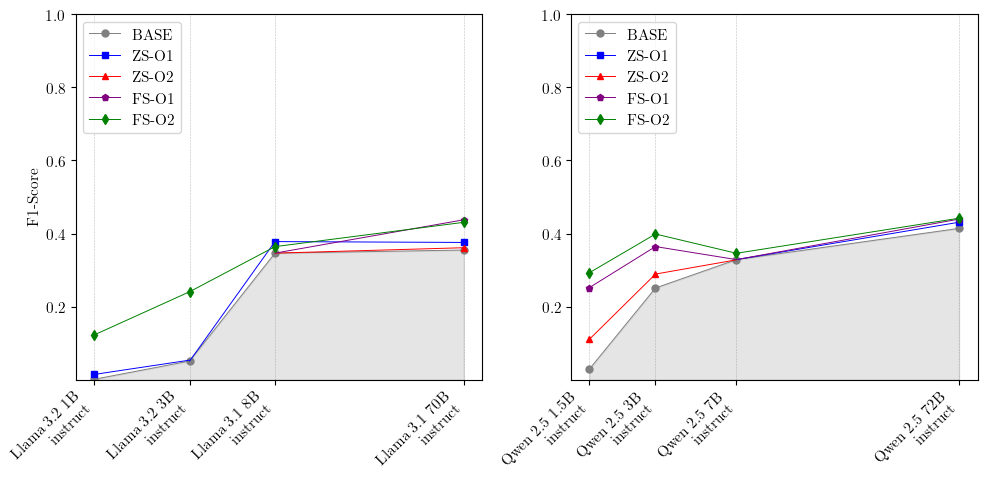

In [47]:
font_size = 11
baseline_fig, ax_llama, ax_qwen = generate_plot_base(font_size=font_size)

llama_model_sizes = [1, 3, 8, 70]
qwen_model_sizes = [1.5, 3, 7, 72]

# === LLAMA BASELINE ===
llama_baseline_data = get_f1_in_order("llama", "Baseline", attack_pattern_extractor_data)

# Fill
ax_llama.fill_between(llama_model_sizes, 0, llama_baseline_data, color="gray", alpha=0.2)

# Points
ax_llama.plot(1, llama_baseline_data[0], marker="o", color="gray", label="BASE", **line_kwargs)
ax_llama.plot(3, llama_baseline_data[1], marker="o", color="gray", **line_kwargs)
ax_llama.plot(8, llama_baseline_data[2], marker="o", color="gray", **line_kwargs)
ax_llama.plot(70, llama_baseline_data[3], marker="o", color="gray", **line_kwargs)

# Lines
ax_llama.plot([1, 3], [llama_baseline_data[0], llama_baseline_data[1]], color="gray", **line_kwargs)
ax_llama.plot([3, 8], [llama_baseline_data[1], llama_baseline_data[2]], color="gray", **line_kwargs)
ax_llama.plot([8, 70], [llama_baseline_data[2], llama_baseline_data[3]], color="gray", **line_kwargs)



# === LLAMA ZERO-SHOT O1 ===
llama_zs_o1 = get_f1_in_order("llama", "ZERO-O1", data=attack_pattern_extractor_data)

# Points
ax_llama.plot(1, llama_zs_o1[0], marker="s", color="blue", label="ZS-O1", **line_kwargs)
# ax_llama.plot(3, llama_zs_o1[1], marker="s", color="blue", **line_kwargs)
ax_llama.plot(8, llama_zs_o1[2], marker="s", color="blue", **line_kwargs)
ax_llama.plot(70, llama_zs_o1[3], marker="s", color="blue", **line_kwargs)

# Lines
ax_llama.plot([1, 3], [llama_zs_o1[0], llama_zs_o1[1]], color="blue", **line_kwargs)
ax_llama.plot([3, 8], [llama_baseline_data[1], llama_zs_o1[2]], color="blue", **line_kwargs)
ax_llama.plot([8, 70], [llama_zs_o1[2], llama_zs_o1[3]], color="blue", **line_kwargs)


# === LLAMA ZERO-SHOT O2 ===
llama_zs_o2 = get_f1_in_order("llama", "ZERO-O2", data=attack_pattern_extractor_data)

# Points
# ax_llama.plot(1, llama_zs_o2[0], marker="^", color="red", label="ZS-O2", **line_kwargs)
# ax_llama.plot(3, llama_zs_o2[1], marker="^", color="red", **line_kwargs)
# ax_llama.plot(8, llama_zs_o2[2], marker="^", color="red", **line_kwargs)
ax_llama.plot(70, llama_zs_o2[3], marker="^", color="red", label="ZS-O2", **line_kwargs)

# Lines
# ax_llama.plot([1, 3], [llama_baseline_data[0], llama_zs_o2[1]], color="red", **line_kwargs)
# ax_llama.plot([3, 8], [llama_zs_o2[1], llama_zs_o2[2]], color="gray", **line_kwargs)
ax_llama.plot([8, 70], [llama_baseline_data[2], llama_zs_o2[3]], color="red", **line_kwargs)




# === LLAMA FEW-SHOT O1 ===
llama_fs_o1 = get_f1_in_order("llama", "FS-O1", data=attack_pattern_extractor_data)

# Points
# ax_llama.plot(1, llama_fs_o1[0], marker="p", color="purple", label="FS-O1", **line_kwargs)
# ax_llama.plot(3, llama_fs_o1[1], marker="p", color="purple", **line_kwargs)
# ax_llama.plot(8, llama_fs_o1[2], marker="p", color="purple", **line_kwargs)
ax_llama.plot(70, llama_fs_o1[3], marker="p", color="purple", label="FS-O1", **line_kwargs)

# Lines
# ax_llama.plot([1, 3], [llama_fs_o1[0], llama_fs_o1[1]], color="purple", **line_kwargs)
# ax_llama.plot([3, 8], [llama_fs_o1[1], llama_fs_o1[2]], color="purple", **line_kwargs)
ax_llama.plot([8, 70], [llama_baseline_data[2], llama_fs_o1[3]], color="purple", **line_kwargs)



# === LLAMA FEW-SHOT O2 ===
llama_fs_o2 = get_f1_in_order("llama", "FS-O2", data=attack_pattern_extractor_data)

# Points
ax_llama.plot(1, llama_fs_o2[0], marker="d", color="green", label="FS-O2", **line_kwargs)
ax_llama.plot(3, llama_fs_o2[1], marker="d", color="green", **line_kwargs)
ax_llama.plot(8, llama_fs_o2[2], marker="d", color="green", **line_kwargs)
ax_llama.plot(70, llama_fs_o2[3], marker="d", color="green", **line_kwargs)

# Lines
ax_llama.plot([1, 3], [llama_fs_o2[0], llama_fs_o2[1]], color="green", **line_kwargs)
ax_llama.plot([3, 8], [llama_fs_o2[1], llama_fs_o2[2]], color="green", **line_kwargs)
ax_llama.plot([8, 70], [llama_fs_o2[2], llama_fs_o2[3]], color="green", **line_kwargs)








# === QWEN BASELINE ===
qwen_baseline_data = get_f1_in_order("qwen", "Baseline", attack_pattern_extractor_data)

# Fill
ax_qwen.fill_between(qwen_model_sizes, 0, qwen_baseline_data, color="gray", alpha=0.2)

# Points
ax_qwen.plot(1.5, qwen_baseline_data[0], marker="o", color="gray", label="BASE", **line_kwargs)
ax_qwen.plot(3, qwen_baseline_data[1], marker="o", color="gray", **line_kwargs)
ax_qwen.plot(7, qwen_baseline_data[2], marker="o", color="gray", **line_kwargs)
ax_qwen.plot(72, qwen_baseline_data[3], marker="o", color="gray", **line_kwargs)

# Lines
ax_qwen.plot([1.5, 3], [qwen_baseline_data[0], qwen_baseline_data[1]], color="gray", **line_kwargs)
ax_qwen.plot([3, 7], [qwen_baseline_data[1], qwen_baseline_data[2]], color="gray", **line_kwargs)
ax_qwen.plot([7, 72], [qwen_baseline_data[2], qwen_baseline_data[3]], color="gray", **line_kwargs)


# === QWEN ZERO-SHOT O1 ===
qwen_zs_o1 = get_f1_in_order("qwen", "ZERO-O1", data=attack_pattern_extractor_data)

# ax_qwen.plot(1.5, qwen_zs_o1[0], marker="s", color="blue", label="ZS-O1", **line_kwargs)
# ax_qwen.plot(3, qwen_zs_o1[1], marker="s", color="blue", **line_kwargs)
# ax_qwen.plot(7, qwen_zs_o1[2], marker="s", color="blue", **line_kwargs)
ax_qwen.plot(72, qwen_zs_o1[3], marker="s", color="blue", label="ZS-O1", **line_kwargs)

# ax_qwen.plot([1.5, 3], [qwen_zs_o1[0], qwen_zs_o1[1]], color="blue", **line_kwargs)
# ax_qwen.plot([3, 7], [qwen_zs_o1[1], qwen_zs_o1[2]], color="blue", **line_kwargs)
ax_qwen.plot([7, 72], [qwen_baseline_data[2], qwen_zs_o1[3]], color="blue", **line_kwargs)


# === QWEN ZERO-SHOT O2 ===
qwen_zs_o2 = get_f1_in_order("qwen", "ZERO-O2", data=attack_pattern_extractor_data)

ax_qwen.plot(1.5, qwen_zs_o2[0], marker="^", color="red", label="ZS-O2", **line_kwargs)
ax_qwen.plot(3, qwen_zs_o2[1], marker="^", color="red", **line_kwargs)
# ax_qwen.plot(7, qwen_zs_o2[2], marker="^", color="red", **line_kwargs)
# ax_qwen.plot(72, qwen_zs_o2[3], marker="^", color="red", **line_kwargs)

ax_qwen.plot([1.5, 3], [qwen_zs_o2[0], qwen_zs_o2[1]], color="red", **line_kwargs)
ax_qwen.plot([3, 7], [qwen_zs_o2[1], qwen_zs_o2[2]], color="red", **line_kwargs)
# ax_qwen.plot([7, 72], [qwen_zs_o2[2], qwen_zs_o2[3]], color="red", **line_kwargs)



# === QWEN FEW-SHOT O1 ===
qwen_fs_o1 = get_f1_in_order("qwen", "FS-O1", data=attack_pattern_extractor_data)

ax_qwen.plot(1.5, qwen_fs_o1[0], marker="p", color="purple", label="FS-O1", **line_kwargs)
ax_qwen.plot(3, qwen_fs_o1[1], marker="p", color="purple", **line_kwargs)
# ax_qwen.plot(7, qwen_fs_o1[2], marker="p", color="purple", **line_kwargs)
ax_qwen.plot(72, qwen_fs_o1[3], marker="p", color="purple", **line_kwargs)

ax_qwen.plot([1.5, 3], [qwen_fs_o1[0], qwen_fs_o1[1]], color="purple", **line_kwargs)
ax_qwen.plot([3, 7], [qwen_fs_o1[1], qwen_baseline_data[2]], color="purple", **line_kwargs)
ax_qwen.plot([7, 72], [qwen_baseline_data[2], qwen_fs_o1[3]], color="purple", **line_kwargs)


# === QWEN FEW-SHOT O2 ===
qwen_fs_o2 = get_f1_in_order("qwen", "FS-O2", data=attack_pattern_extractor_data)

ax_qwen.plot(1.5, qwen_fs_o2[0], marker="d", color="green", label="FS-O2", **line_kwargs)
ax_qwen.plot(3, qwen_fs_o2[1], marker="d", color="green", **line_kwargs)
ax_qwen.plot(7, qwen_fs_o2[2], marker="d", color="green", **line_kwargs)
ax_qwen.plot(72, qwen_fs_o2[3], marker="d", color="green", **line_kwargs)

ax_qwen.plot([1.5, 3], [qwen_fs_o2[0], qwen_fs_o2[1]], color="green", **line_kwargs)
ax_qwen.plot([3, 7], [qwen_fs_o2[1], qwen_fs_o2[2]], color="green", **line_kwargs)
ax_qwen.plot([7, 72], [qwen_fs_o2[2], qwen_fs_o2[3]], color="green", **line_kwargs)



# === LEGENDS + SAVE ===
ax_llama.legend(loc="upper left", prop={'size': font_size})
ax_qwen.legend(loc="upper left", prop={'size': font_size})

# baseline_fig.savefig("./pgfs/AttackPatternExtractorFS.pgf")

# Targets Extractor

In [48]:
targets_extractor_data = utils.load_json_files("./Modules/TargetsExtractor/", ["Baseline", "ZERO-O1", "ZERO-O2", "FS-O1", "FS-O2"], models=["llama_3_2_1b_instruct", "llama_3_2_3b_instruct", "llama_3_1_8b_instruct", "llama_3_1_70b_instruct", "qwen_2_5_1p5b_instruct", "qwen_2_5_3b_instruct", "qwen_2_5_7b_instruct", "qwen_2_5_72b_instruct"])

In [49]:
print_baseline_table(targets_extractor_data, print_latex_help=True)

Llama 3.2 1b instruct & 0.04 & 0.04 & 0.04 \\
Llama 3.2 3b instruct & 0.03 & 0.04 & 0.03 \\
Llama 3.1 8b instruct & 0.29 & 0.3 & 0.29 \\
Llama 3.1 70b instruct & 0.28 & 0.29 & 0.29 \\
Qwen 2.5 1.5b instruct & 0.17 & 0.17 & 0.17 \\
Qwen 2.5 3b instruct & 0.16 & 0.16 & 0.16 \\
Qwen 2.5 7b instruct & 0.12 & 0.12 & 0.12 \\
Qwen 2.5 72b instruct & 0.32 & 0.34 & 0.32 \\


,Model,F1,Precision,Recall
0,llama_3_2_1b_instruct,0.04,0.04,0.04
1,llama_3_2_3b_instruct,0.03,0.04,0.03
2,llama_3_1_8b_instruct,0.29,0.30,0.29
3,llama_3_1_70b_instruct,0.28,0.29,0.29
4,qwen_2_5_1p5b_instruct,0.17,0.17,0.17
5,qwen_2_5_3b_instruct,0.16,0.16,0.16
6,qwen_2_5_7b_instruct,0.12,0.12,0.12
7,qwen_2_5_72b_instruct,0.32,0.34,0.32


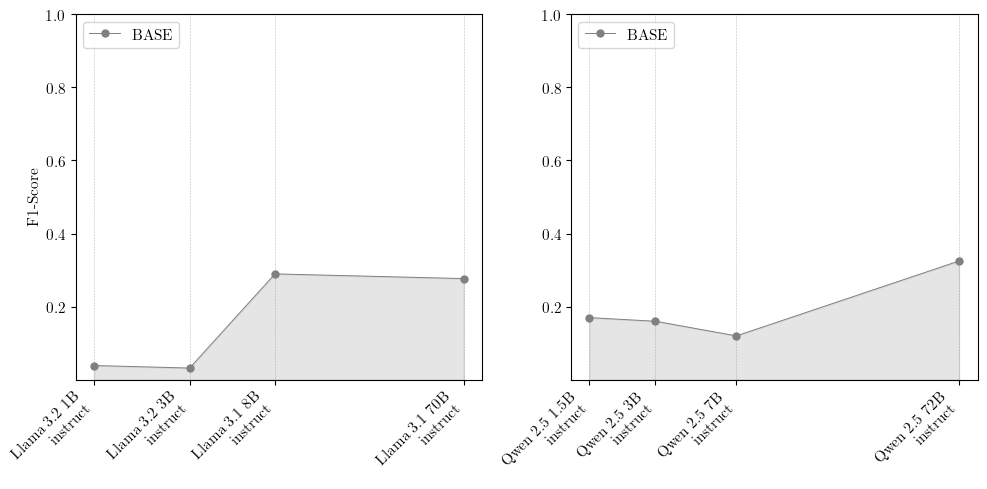

In [50]:
font_size = 11
baseline_fig, ax_llama, ax_qwen = generate_plot_base(font_size=font_size)

llama_model_sizes = [1, 3, 8, 70]
qwen_model_sizes = [1.5, 3, 7, 72]

# === LLAMA BASELINE ===
llama_baseline_data = get_f1_in_order("llama", "Baseline", targets_extractor_data)

# Fill
ax_llama.fill_between(llama_model_sizes, 0, llama_baseline_data, color="gray", alpha=0.2)

# Points
ax_llama.plot(1, llama_baseline_data[0], marker="o", color="gray", label="BASE", **line_kwargs)
ax_llama.plot(3, llama_baseline_data[1], marker="o", color="gray", **line_kwargs)
ax_llama.plot(8, llama_baseline_data[2], marker="o", color="gray", **line_kwargs)
ax_llama.plot(70, llama_baseline_data[3], marker="o", color="gray", **line_kwargs)

# Lines
ax_llama.plot([1, 3], [llama_baseline_data[0], llama_baseline_data[1]], color="gray", **line_kwargs)
ax_llama.plot([3, 8], [llama_baseline_data[1], llama_baseline_data[2]], color="gray", **line_kwargs)
ax_llama.plot([8, 70], [llama_baseline_data[2], llama_baseline_data[3]], color="gray", **line_kwargs)



# === QWEN BASELINE ===
qwen_baseline_data = get_f1_in_order("qwen", "Baseline", targets_extractor_data)

# Fill
ax_qwen.fill_between(qwen_model_sizes, 0, qwen_baseline_data, color="gray", alpha=0.2)

# Points
ax_qwen.plot(1.5, qwen_baseline_data[0], marker="o", color="gray", label="BASE", **line_kwargs)
ax_qwen.plot(3, qwen_baseline_data[1], marker="o", color="gray", **line_kwargs)
ax_qwen.plot(7, qwen_baseline_data[2], marker="o", color="gray", **line_kwargs)
ax_qwen.plot(72, qwen_baseline_data[3], marker="o", color="gray", **line_kwargs)

# Lines
ax_qwen.plot([1.5, 3], [qwen_baseline_data[0], qwen_baseline_data[1]], color="gray", **line_kwargs)
ax_qwen.plot([3, 7], [qwen_baseline_data[1], qwen_baseline_data[2]], color="gray", **line_kwargs)
ax_qwen.plot([7, 72], [qwen_baseline_data[2], qwen_baseline_data[3]], color="gray", **line_kwargs)

# === LEGENDS + SAVE ===
ax_llama.legend(loc="upper left", prop={'size': font_size})
ax_qwen.legend(loc="upper left", prop={'size': font_size})

# baseline_fig.savefig("./pgfs/TargetsExtractorBase.pgf")

In [27]:
df = print_few_shot_table(targets_extractor_data, print_latex_help=True)

for col in df.columns:
    if "Recall" in str(col) or "Precision" in str(col):
        df = df.drop(col, axis=1)

df

Llama 3.2 1b instruct & 0.04 & 0.04 & 0.04 & 0.2 & 0.21 & 0.22 & 0.28 & 0.29 & 0.28 & 0.04 & 0.04 & 0.04 & 0.03 & 0.03 & 0.03 \\
Llama 3.2 3b instruct & 0.03 & 0.04 & 0.03 & 0.56 & 0.6 & 0.55 & 0.54 & 0.59 & 0.53 & 0.23 & 0.24 & 0.22 & 0.07 & 0.07 & 0.07 \\
Llama 3.1 8b instruct & 0.29 & 0.3 & 0.29 & 0.68 & 0.73 & 0.66 & 0.63 & 0.69 & 0.62 & 0.28 & 0.29 & 0.28 & 0.36 & 0.37 & 0.37 \\
Llama 3.1 70b instruct & 0.28 & 0.29 & 0.29 & 0.67 & 0.7 & 0.66 & 0.68 & 0.71 & 0.67 & 0.33 & 0.35 & 0.32 & 0.52 & 0.55 & 0.51 \\
Qwen 2.5 1.5b instruct & 0.17 & 0.17 & 0.17 & 0.51 & 0.54 & 0.53 & 0.51 & 0.52 & 0.53 & 0.28 & 0.28 & 0.28 & 0.32 & 0.32 & 0.32 \\
Qwen 2.5 3b instruct & 0.16 & 0.16 & 0.16 & 0.54 & 0.58 & 0.53 & 0.56 & 0.59 & 0.54 & 0.28 & 0.28 & 0.27 & 0.27 & 0.27 & 0.26 \\
Qwen 2.5 7b instruct & 0.12 & 0.12 & 0.12 & 0.64 & 0.69 & 0.63 & 0.66 & 0.7 & 0.65 & 0.26 & 0.26 & 0.27 & 0.35 & 0.35 & 0.35 \\
Qwen 2.5 72b instruct & 0.32 & 0.34 & 0.32 & 0.56 & 0.59 & 0.55 & 0.59 & 0.63 & 0.58 & 0.31 & 0

,Model,F1,FS-O1-F1,FS-O2-F1,ZS-O1-F1,ZS-O2-F1
0,llama_3_2_1b_instruct,0.04,0.20,0.28,0.04,0.03
1,llama_3_2_3b_instruct,0.03,0.56,0.54,0.23,0.07
2,llama_3_1_8b_instruct,0.29,0.68,0.63,0.28,0.36
3,llama_3_1_70b_instruct,0.28,0.67,0.68,0.33,0.52
4,qwen_2_5_1p5b_instruct,0.17,0.51,0.51,0.28,0.32
5,qwen_2_5_3b_instruct,0.16,0.54,0.56,0.28,0.27
6,qwen_2_5_7b_instruct,0.12,0.64,0.66,0.26,0.35
7,qwen_2_5_72b_instruct,0.32,0.56,0.59,0.31,0.41


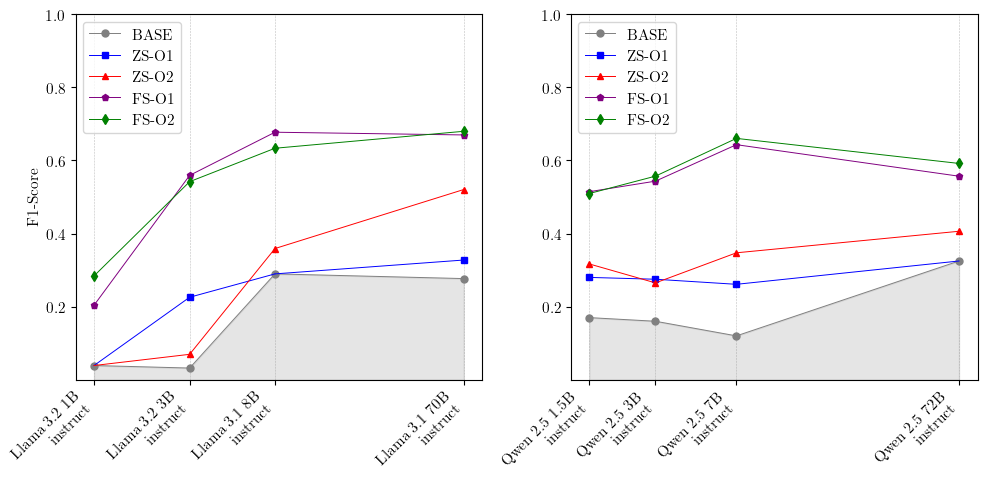

In [29]:
font_size = 11
baseline_fig, ax_llama, ax_qwen = generate_plot_base(font_size=font_size)

llama_model_sizes = [1, 3, 8, 70]
qwen_model_sizes = [1.5, 3, 7, 72]

# === LLAMA BASELINE ===
llama_baseline_data = get_f1_in_order("llama", "Baseline", targets_extractor_data)

# Fill
ax_llama.fill_between(llama_model_sizes, 0, llama_baseline_data, color="gray", alpha=0.2)

# Points
ax_llama.plot(1, llama_baseline_data[0], marker="o", color="gray", label="BASE", **line_kwargs)
ax_llama.plot(3, llama_baseline_data[1], marker="o", color="gray", **line_kwargs)
ax_llama.plot(8, llama_baseline_data[2], marker="o", color="gray", **line_kwargs)
ax_llama.plot(70, llama_baseline_data[3], marker="o", color="gray", **line_kwargs)

# Lines
ax_llama.plot([1, 3], [llama_baseline_data[0], llama_baseline_data[1]], color="gray", **line_kwargs)
ax_llama.plot([3, 8], [llama_baseline_data[1], llama_baseline_data[2]], color="gray", **line_kwargs)
ax_llama.plot([8, 70], [llama_baseline_data[2], llama_baseline_data[3]], color="gray", **line_kwargs)


# === LLAMA ZERO-SHOT O1 ===
llama_zs_o1 = get_f1_in_order("llama", "ZERO-O1", data=targets_extractor_data)

# Points
# ax_llama.plot(1, llama_zs_o1[0], marker="s", color="blue", label="ZS-O1", **line_kwargs)
ax_llama.plot(3, llama_zs_o1[1], marker="s", color="blue", label="ZS-O1", **line_kwargs)
# ax_llama.plot(8, llama_zs_o1[2], marker="s", color="blue", **line_kwargs)
ax_llama.plot(70, llama_zs_o1[3], marker="s", color="blue", **line_kwargs)

# Lines
ax_llama.plot([1, 3], [llama_baseline_data[0], llama_zs_o1[1]], color="blue", **line_kwargs)
ax_llama.plot([3, 8], [llama_zs_o1[1], llama_baseline_data[2]], color="blue", **line_kwargs)
ax_llama.plot([8, 70], [llama_baseline_data[2], llama_zs_o1[3]], color="blue", **line_kwargs)



# === LLAMA ZERO-SHOT O2 ===
llama_zs_o2 = get_f1_in_order("llama", "ZERO-O2", data=targets_extractor_data)

# Points
# ax_llama.plot(1, llama_zs_o2[0], marker="^", color="red", label="ZS-O2", **line_kwargs)
ax_llama.plot(3, llama_zs_o2[1], marker="^", color="red", label="ZS-O2", **line_kwargs)
ax_llama.plot(8, llama_zs_o2[2], marker="^", color="red", **line_kwargs)
ax_llama.plot(70, llama_zs_o2[3], marker="^", color="red", **line_kwargs)

# Lines
ax_llama.plot([1, 3], [llama_baseline_data[0], llama_zs_o2[1]], color="red", **line_kwargs)
ax_llama.plot([3, 8], [llama_zs_o2[1], llama_zs_o2[2]], color="red", **line_kwargs)
ax_llama.plot([8, 70], [llama_zs_o2[2], llama_zs_o2[3]], color="red", **line_kwargs)


# === LLAMA FEW-SHOT O1 ===
llama_fs_o1 = get_f1_in_order("llama", "FS-O1", data=targets_extractor_data)

# Points
ax_llama.plot(1, llama_fs_o1[0], marker="p", color="purple", label="FS-O1", **line_kwargs)
ax_llama.plot(3, llama_fs_o1[1], marker="p", color="purple", **line_kwargs)
ax_llama.plot(8, llama_fs_o1[2], marker="p", color="purple", **line_kwargs)
ax_llama.plot(70, llama_fs_o1[3], marker="p", color="purple", **line_kwargs)

# Lines
ax_llama.plot([1, 3], [llama_fs_o1[0], llama_fs_o1[1]], color="purple", **line_kwargs)
ax_llama.plot([3, 8], [llama_fs_o1[1], llama_fs_o1[2]], color="purple", **line_kwargs)
ax_llama.plot([8, 70], [llama_fs_o1[2], llama_fs_o1[3]], color="purple", **line_kwargs)



# === LLAMA FEW-SHOT O2 ===
llama_fs_o2 = get_f1_in_order("llama", "FS-O2", data=targets_extractor_data)

# Points
ax_llama.plot(1, llama_fs_o2[0], marker="d", color="green", label="FS-O2", **line_kwargs)
ax_llama.plot(3, llama_fs_o2[1], marker="d", color="green", **line_kwargs)
ax_llama.plot(8, llama_fs_o2[2], marker="d", color="green", **line_kwargs)
ax_llama.plot(70, llama_fs_o2[3], marker="d", color="green", **line_kwargs)

# Lines
ax_llama.plot([1, 3], [llama_fs_o2[0], llama_fs_o2[1]], color="green", **line_kwargs)
ax_llama.plot([3, 8], [llama_fs_o2[1], llama_fs_o2[2]], color="green", **line_kwargs)
ax_llama.plot([8, 70], [llama_fs_o2[2], llama_fs_o2[3]], color="green", **line_kwargs)



# === QWEN BASELINE ===
qwen_baseline_data = get_f1_in_order("qwen", "Baseline", targets_extractor_data)

# Fill
ax_qwen.fill_between(qwen_model_sizes, 0, qwen_baseline_data, color="gray", alpha=0.2)

# Points
ax_qwen.plot(1.5, qwen_baseline_data[0], marker="o", color="gray", label="BASE", **line_kwargs)
ax_qwen.plot(3, qwen_baseline_data[1], marker="o", color="gray", **line_kwargs)
ax_qwen.plot(7, qwen_baseline_data[2], marker="o", color="gray", **line_kwargs)
ax_qwen.plot(72, qwen_baseline_data[3], marker="o", color="gray", **line_kwargs)

# Lines
ax_qwen.plot([1.5, 3], [qwen_baseline_data[0], qwen_baseline_data[1]], color="gray", **line_kwargs)
ax_qwen.plot([3, 7], [qwen_baseline_data[1], qwen_baseline_data[2]], color="gray", **line_kwargs)
ax_qwen.plot([7, 72], [qwen_baseline_data[2], qwen_baseline_data[3]], color="gray", **line_kwargs)



# === QWEN ZERO-SHOT O1 ===
qwen_zs_o1 = get_f1_in_order("qwen", "ZERO-O1", data=targets_extractor_data)

ax_qwen.plot(1.5, qwen_zs_o1[0], marker="s", color="blue", label="ZS-O1", **line_kwargs)
ax_qwen.plot(3, qwen_zs_o1[1], marker="s", color="blue", **line_kwargs)
ax_qwen.plot(7, qwen_zs_o1[2], marker="s", color="blue", **line_kwargs)
# ax_qwen.plot(72, qwen_zs_o1[3], marker="s", color="blue", **line_kwargs)

ax_qwen.plot([1.5, 3], [qwen_zs_o1[0], qwen_zs_o1[1]], color="blue", **line_kwargs)
ax_qwen.plot([3, 7], [qwen_zs_o1[1], qwen_zs_o1[2]], color="blue", **line_kwargs)
ax_qwen.plot([7, 72], [qwen_zs_o1[2], qwen_baseline_data[3]], color="blue", **line_kwargs)


# === QWEN ZERO-SHOT O2 ===
qwen_zs_o2 = get_f1_in_order("qwen", "ZERO-O2", data=targets_extractor_data)

ax_qwen.plot(1.5, qwen_zs_o2[0], marker="^", color="red", label="ZS-O2", **line_kwargs)
ax_qwen.plot(3, qwen_zs_o2[1], marker="^", color="red", **line_kwargs)
ax_qwen.plot(7, qwen_zs_o2[2], marker="^", color="red", **line_kwargs)
ax_qwen.plot(72, qwen_zs_o2[3], marker="^", color="red", **line_kwargs)

ax_qwen.plot([1.5, 3], [qwen_zs_o2[0], qwen_zs_o2[1]], color="red", **line_kwargs)
ax_qwen.plot([3, 7], [qwen_zs_o2[1], qwen_zs_o2[2]], color="red", **line_kwargs)
ax_qwen.plot([7, 72], [qwen_zs_o2[2], qwen_zs_o2[3]], color="red", **line_kwargs)



# === QWEN FEW-SHOT O1 ===
qwen_fs_o1 = get_f1_in_order("qwen", "FS-O1", data=targets_extractor_data)

ax_qwen.plot(1.5, qwen_fs_o1[0], marker="p", color="purple", label="FS-O1", **line_kwargs)
ax_qwen.plot(3, qwen_fs_o1[1], marker="p", color="purple", **line_kwargs)
ax_qwen.plot(7, qwen_fs_o1[2], marker="p", color="purple", **line_kwargs)
ax_qwen.plot(72, qwen_fs_o1[3], marker="p", color="purple", **line_kwargs)

ax_qwen.plot([1.5, 3], [qwen_fs_o1[0], qwen_fs_o1[1]], color="purple", **line_kwargs)
ax_qwen.plot([3, 7], [qwen_fs_o1[1], qwen_fs_o1[2]], color="purple", **line_kwargs)
ax_qwen.plot([7, 72], [qwen_fs_o1[2], qwen_fs_o1[3]], color="purple", **line_kwargs)



# === QWEN FEW-SHOT O2 ===
qwen_fs_o2 = get_f1_in_order("qwen", "FS-O2", data=targets_extractor_data)

ax_qwen.plot(1.5, qwen_fs_o2[0], marker="d", color="green", label="FS-O2", **line_kwargs)
ax_qwen.plot(3, qwen_fs_o2[1], marker="d", color="green", **line_kwargs)
ax_qwen.plot(7, qwen_fs_o2[2], marker="d", color="green", **line_kwargs)
ax_qwen.plot(72, qwen_fs_o2[3], marker="d", color="green", **line_kwargs)

ax_qwen.plot([1.5, 3], [qwen_fs_o2[0], qwen_fs_o2[1]], color="green", **line_kwargs)
ax_qwen.plot([3, 7], [qwen_fs_o2[1], qwen_fs_o2[2]], color="green", **line_kwargs)
ax_qwen.plot([7, 72], [qwen_fs_o2[2], qwen_fs_o2[3]], color="green", **line_kwargs)


# === LEGENDS + SAVE ===
ax_llama.legend(loc="upper left", prop={'size': font_size})
ax_qwen.legend(loc="upper left", prop={'size': font_size})

# baseline_fig.savefig("./pgfs/TargetsExtractorFS.pgf")

In [30]:
import os 
import json 


def load_retry_stats_files(base_path, categories, models):
    data = {}

    for model in models: 
        data[model] = dict() 

        data[model]["Baseline"] = dict()
        data[model]["ZERO-O1"] = dict()
        data[model]["ZERO-O2"] = dict()
        data[model]["FS-O1"] = dict()
        data[model]["FS-O2"] = dict()

    for category in categories: 
        for model in models: 
            # retry_stats
            file_path = os.path.join(base_path, category, f"{model}_retry_stats.json")
            with open(file_path, "r") as fp:
                data[model][category] = json.load(fp)
                
    return data

In [31]:
def print_retry_stats_table(data: dict, print_latex_help: bool = False) -> pd.DataFrame:
    table_data = []


    def calc_retry_table(retry_stats: typing.List[dict]):
        total_failed, total_finished, finished_with_retries = 0, 0, [] 

        for retry_stat in retry_stats:
            if retry_stat["finished"]:
                total_finished += 1
                finished_with_retries.append(retry_stat["retries"] + 1)
            else:
                total_failed += 1
        
        assert len(finished_with_retries) == total_finished

        avg_retries = utils.calc_avg(finished_with_retries, 2)
        return total_failed, total_finished, avg_retries


    for model, values in data.items():
        baseline_retry_stats = values["Baseline"]
        zs_o1_retry_stats = values["ZERO-O1"]
        zs_o2_retry_stats = values["ZERO-O2"]
        fs_o1_retry_stats = values["FS-O1"]
        fs_o2_retry_stats = values["FS-O2"]


        baseline_total_failed, baseline_total_finished, baseline_avg_retries = calc_retry_table(baseline_retry_stats)
        zs_o1_total_failed, zs_o1_total_finished, zs_o1_avg_retries = calc_retry_table(zs_o1_retry_stats)
        zs_o2_total_failed, zs_o2_total_finished, zs_o2_avg_retries = calc_retry_table(zs_o2_retry_stats)
        fs_o1_total_failed, fs_o1_total_finished, fs_o1_avg_retries = calc_retry_table(fs_o1_retry_stats)
        fs_o2_total_failed, fs_o2_total_finished, fs_o2_avg_retries = calc_retry_table(fs_o2_retry_stats)

        table_data.append([model, baseline_total_failed, baseline_total_finished, baseline_avg_retries, 
                           zs_o1_total_failed, zs_o1_total_finished, zs_o1_avg_retries,
                           zs_o2_total_failed, zs_o2_total_finished, zs_o2_avg_retries,
                           fs_o1_total_failed, fs_o1_total_finished, fs_o1_avg_retries,
                           fs_o2_total_failed, fs_o2_total_finished, fs_o2_avg_retries])


        if print_latex_help: 
            models_str = {"llama_3_2_1b_instruct": "Llama 3.2 1b instruct", "llama_3_2_3b_instruct": "Llama 3.2 3b instruct", "llama_3_1_8b_instruct": "Llama 3.1 8b instruct", "llama_3_1_70b_instruct": "Llama 3.1 70b instruct", "qwen_2_5_1p5b_instruct": "Qwen 2.5 1.5b instruct", "qwen_2_5_3b_instruct": "Qwen 2.5 3b instruct", "qwen_2_5_7b_instruct": "Qwen 2.5 7b instruct", "qwen_2_5_72b_instruct": "Qwen 2.5 72b instruct"}
            print(models_str[model], "&", 
                  baseline_total_failed, "&", baseline_total_finished, "&", baseline_avg_retries, "&", 
                  
                  
                  
                  fs_o1_total_failed, "&", fs_o1_total_finished, "&", fs_o1_avg_retries, "&", 
                  fs_o2_total_failed, "&", fs_o2_total_finished, "&", fs_o2_avg_retries, "&",
                  
                  zs_o1_total_failed, "&", zs_o1_total_finished, "&", zs_o1_avg_retries, "&", 
                  zs_o2_total_failed, "&", zs_o2_total_finished, "&", zs_o2_avg_retries, "\\\\", )


    df = pd.DataFrame(table_data, columns=["Model", "base_total_failed", "base_total_finished", "base_avg_retries",
                                              "zs_o1_total_failed", "zs_o1_total_finished", "zs_o1_avg_retries",
                                              "zs_o2_total_failed", "zs_o2_total_finished", "zs_o2_avg_retries",
                                              "fs_o1_total_failed", "fs_o1_total_finished", "fs_o1_avg_retries",
                                              "fs_o2_total_failed", "fs_o2_total_finished", "fs_o2_avg_retries"])

    
    df.style.set_properties(**{'text-align': 'left'}).set_table_styles(
        [{'selector': 'th', 'props': [('text-align', 'center')]}]
    )
    

    return df 

# Attack Pattern Retry Stats

In [33]:
retry_stats = load_retry_stats_files("./Modules/AttackPatternExtractor/", categories=["Baseline", "ZERO-O1", "ZERO-O2", "FS-O1", "FS-O2"], models=["llama_3_2_1b_instruct", "llama_3_2_3b_instruct", "llama_3_1_8b_instruct", "llama_3_1_70b_instruct", "qwen_2_5_1p5b_instruct", "qwen_2_5_3b_instruct", "qwen_2_5_7b_instruct", "qwen_2_5_72b_instruct"])

print_retry_stats_table(retry_stats, print_latex_help=True)

Llama 3.2 1b instruct & 97 & 3 & 2.67 & 97 & 3 & 2.0 & 13 & 87 & 1.21 & 77 & 23 & 2.0 & 98 & 2 & 1.5 \\
Llama 3.2 3b instruct & 51 & 49 & 2.2 & 59 & 41 & 2.02 & 12 & 88 & 1.23 & 11 & 89 & 1.44 & 54 & 46 & 2.11 \\
Llama 3.1 8b instruct & 2 & 98 & 1.1 & 3 & 97 & 1.06 & 0 & 100 & 1.02 & 0 & 100 & 1.15 & 2 & 98 & 1.17 \\
Llama 3.1 70b instruct & 0 & 100 & 1.03 & 3 & 97 & 1.16 & 0 & 100 & 1.01 & 0 & 100 & 1.05 & 1 & 99 & 1.08 \\
Qwen 2.5 1.5b instruct & 0 & 100 & 1.37 & 16 & 84 & 1.54 & 14 & 86 & 1.5 & 0 & 100 & 1.13 & 0 & 100 & 1.12 \\
Qwen 2.5 3b instruct & 0 & 100 & 1.05 & 4 & 96 & 1.27 & 2 & 98 & 1.17 & 0 & 100 & 1.04 & 0 & 100 & 1.06 \\
Qwen 2.5 7b instruct & 2 & 98 & 1.12 & 1 & 99 & 1.1 & 6 & 94 & 1.15 & 2 & 98 & 1.07 & 1 & 99 & 1.06 \\
Qwen 2.5 72b instruct & 3 & 97 & 1.08 & 4 & 96 & 1.05 & 2 & 98 & 1.13 & 3 & 97 & 1.02 & 3 & 97 & 1.06 \\


,Model,base_total_failed,base_total_finished,base_avg_retries,zs_o1_total_failed,zs_o1_total_finished,zs_o1_avg_retries,zs_o2_total_failed,zs_o2_total_finished,zs_o2_avg_retries,fs_o1_total_failed,fs_o1_total_finished,fs_o1_avg_retries,fs_o2_total_failed,fs_o2_total_finished,fs_o2_avg_retries
0,llama_3_2_1b_instruct,97,3,2.67,77,23,2.00,98,2,1.50,97,3,2.00,13,87,1.21
1,llama_3_2_3b_instruct,51,49,2.20,11,89,1.44,54,46,2.11,59,41,2.02,12,88,1.23
2,llama_3_1_8b_instruct,2,98,1.10,0,100,1.15,2,98,1.17,3,97,1.06,0,100,1.02
3,llama_3_1_70b_instruct,0,100,1.03,0,100,1.05,1,99,1.08,3,97,1.16,0,100,1.01
4,qwen_2_5_1p5b_instruct,0,100,1.37,0,100,1.13,0,100,1.12,16,84,1.54,14,86,1.50
5,qwen_2_5_3b_instruct,0,100,1.05,0,100,1.04,0,100,1.06,4,96,1.27,2,98,1.17
6,qwen_2_5_7b_instruct,2,98,1.12,2,98,1.07,1,99,1.06,1,99,1.10,6,94,1.15
7,qwen_2_5_72b_instruct,3,97,1.08,3,97,1.02,3,97,1.06,4,96,1.05,2,98,1.13


# Targets Extractor Retry Stats

In [35]:
retry_stats = load_retry_stats_files("./Modules/TargetsExtractor/", categories=["Baseline", "ZERO-O1", "ZERO-O2", "FS-O1", "FS-O2"], models=["llama_3_2_1b_instruct", "llama_3_2_3b_instruct", "llama_3_1_8b_instruct", "llama_3_1_70b_instruct", "qwen_2_5_1p5b_instruct", "qwen_2_5_3b_instruct", "qwen_2_5_7b_instruct", "qwen_2_5_72b_instruct"])

print_retry_stats_table(retry_stats, print_latex_help=True)

Llama 3.2 1b instruct & 86 & 14 & 2.0 & 25 & 75 & 1.35 & 11 & 89 & 1.25 & 84 & 16 & 2.56 & 86 & 14 & 1.86 \\
Llama 3.2 3b instruct & 68 & 32 & 1.91 & 11 & 89 & 1.16 & 10 & 90 & 1.16 & 39 & 61 & 1.43 & 65 & 35 & 1.91 \\
Llama 3.1 8b instruct & 19 & 81 & 1.35 & 0 & 100 & 1.0 & 0 & 100 & 1.0 & 16 & 84 & 1.39 & 3 & 97 & 1.05 \\
Llama 3.1 70b instruct & 34 & 66 & 1.17 & 6 & 94 & 1.04 & 4 & 96 & 1.09 & 41 & 59 & 1.14 & 2 & 98 & 1.08 \\
Qwen 2.5 1.5b instruct & 20 & 80 & 1.73 & 10 & 90 & 1.38 & 8 & 92 & 1.38 & 4 & 96 & 1.2 & 2 & 98 & 1.11 \\
Qwen 2.5 3b instruct & 32 & 68 & 1.12 & 6 & 94 & 1.05 & 3 & 97 & 1.04 & 18 & 82 & 1.1 & 11 & 89 & 1.11 \\
Qwen 2.5 7b instruct & 11 & 89 & 1.27 & 5 & 95 & 1.13 & 3 & 97 & 1.1 & 33 & 67 & 1.18 & 7 & 93 & 1.12 \\
Qwen 2.5 72b instruct & 25 & 75 & 1.32 & 19 & 81 & 1.09 & 13 & 87 & 1.15 & 20 & 80 & 1.29 & 1 & 99 & 1.01 \\


,Model,base_total_failed,base_total_finished,base_avg_retries,zs_o1_total_failed,zs_o1_total_finished,zs_o1_avg_retries,zs_o2_total_failed,zs_o2_total_finished,zs_o2_avg_retries,fs_o1_total_failed,fs_o1_total_finished,fs_o1_avg_retries,fs_o2_total_failed,fs_o2_total_finished,fs_o2_avg_retries
0,llama_3_2_1b_instruct,86,14,2.00,84,16,2.56,86,14,1.86,25,75,1.35,11,89,1.25
1,llama_3_2_3b_instruct,68,32,1.91,39,61,1.43,65,35,1.91,11,89,1.16,10,90,1.16
2,llama_3_1_8b_instruct,19,81,1.35,16,84,1.39,3,97,1.05,0,100,1.00,0,100,1.00
3,llama_3_1_70b_instruct,34,66,1.17,41,59,1.14,2,98,1.08,6,94,1.04,4,96,1.09
4,qwen_2_5_1p5b_instruct,20,80,1.73,4,96,1.20,2,98,1.11,10,90,1.38,8,92,1.38
5,qwen_2_5_3b_instruct,32,68,1.12,18,82,1.10,11,89,1.11,6,94,1.05,3,97,1.04
6,qwen_2_5_7b_instruct,11,89,1.27,33,67,1.18,7,93,1.12,5,95,1.13,3,97,1.10
7,qwen_2_5_72b_instruct,25,75,1.32,20,80,1.29,1,99,1.01,19,81,1.09,13,87,1.15
